In [1]:
import glob
import os
import pandas as pd
from io import StringIO
from matplotlib import pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')
import numpy as np

%matplotlib inline
%load_ext autoreload
%autoreload 2

### RNA-seq short-read sequencing data

In [2]:
dataset = '/cluster/work/grlab/projects/metagenome/benchmark_kingsford/data_fasta/SRR*.fasta.gz'

In [3]:
files = glob.glob(dataset)
files[:10]

['/cluster/work/grlab/projects/metagenome/benchmark_kingsford/data_fasta/SRR1035700.fasta.gz',
 '/cluster/work/grlab/projects/metagenome/benchmark_kingsford/data_fasta/SRR654041.fasta.gz',
 '/cluster/work/grlab/projects/metagenome/benchmark_kingsford/data_fasta/SRR191536.fasta.gz',
 '/cluster/work/grlab/projects/metagenome/benchmark_kingsford/data_fasta/SRR343348.fasta.gz',
 '/cluster/work/grlab/projects/metagenome/benchmark_kingsford/data_fasta/SRR805884.fasta.gz',
 '/cluster/work/grlab/projects/metagenome/benchmark_kingsford/data_fasta/SRR403016.fasta.gz',
 '/cluster/work/grlab/projects/metagenome/benchmark_kingsford/data_fasta/SRR846956.fasta.gz',
 '/cluster/work/grlab/projects/metagenome/benchmark_kingsford/data_fasta/SRR1002075.fasta.gz',
 '/cluster/work/grlab/projects/metagenome/benchmark_kingsford/data_fasta/SRR567154.fasta.gz',
 '/cluster/work/grlab/projects/metagenome/benchmark_kingsford/data_fasta/SRR1066641.fasta.gz']

In [4]:
print('Files in the dataset: {}'.format(len(files)))
print('Size of the dataset: {:.2f} Gib'.format(sum([os.path.getsize(x) for x in files]) / 2**30))

Files in the dataset: 2652
Size of the dataset: 2948.94 Gib


In [5]:
data_size = pd.Series(data=[os.path.getsize(x) / 2**30 for x in files], index=[x.split('/')[-1][:-len('.fasta.gz')] for x in files])
data_size.head()

SRR1035700    1.269203
SRR654041     0.349531
SRR191536     0.000381
SRR343348     0.112754
SRR805884     2.364810
dtype: float64

In [6]:
annotation = '/cluster/home/mikhaika/big_graph/graph_SRR_k20_2/annotation/*.color.annodbg'
anno_files = glob.glob(annotation)
anno_files[:10]

['/cluster/home/mikhaika/big_graph/graph_SRR_k20_2/annotation/SRR101424.color.annodbg',
 '/cluster/home/mikhaika/big_graph/graph_SRR_k20_2/annotation/SRR1047839.color.annodbg',
 '/cluster/home/mikhaika/big_graph/graph_SRR_k20_2/annotation/SRR543516.color.annodbg',
 '/cluster/home/mikhaika/big_graph/graph_SRR_k20_2/annotation/SRR066463.color.annodbg',
 '/cluster/home/mikhaika/big_graph/graph_SRR_k20_2/annotation/SRR306839.color.annodbg',
 '/cluster/home/mikhaika/big_graph/graph_SRR_k20_2/annotation/SRR448330.color.annodbg',
 '/cluster/home/mikhaika/big_graph/graph_SRR_k20_2/annotation/SRR353645.color.annodbg',
 '/cluster/home/mikhaika/big_graph/graph_SRR_k20_2/annotation/SRR934636.color.annodbg',
 '/cluster/home/mikhaika/big_graph/graph_SRR_k20_2/annotation/SRR343345.color.annodbg',
 '/cluster/home/mikhaika/big_graph/graph_SRR_k20_2/annotation/SRR567136.color.annodbg']

In [7]:
print('Size of annotation: {:.2f} Gib'.format(sum([os.path.getsize(x) for x in anno_files]) / 2**30))

Size of annotation: 24.40 Gib


In [8]:
column_size = pd.Series(data=[os.path.getsize(x) / 2**30 for x in anno_files], index=[x.split('/')[-1][:-len('.color.annodbg')] for x in anno_files])
column_size.head()

SRR101424     0.002247
SRR1047839    0.007285
SRR543516     0.003775
SRR066463     0.004361
SRR306839     0.009361
dtype: float64

In [9]:
stats = pd.DataFrame(data_size, columns=['ComprData'])
stats['Annotation'] = column_size
stats.head()

,ComprData,Annotation
SRR1035700,1.269203,1.385124e-02
SRR654041,0.349531,3.799959e-03
SRR191536,0.000381,2.695192e-04
SRR343348,0.112754,2.235174e-08
SRR805884,2.364810,1.031428e-02


In [10]:
!./metagraph/build/metagengraph stats -a /cluster/work/grlab/projects/metagenome/benchmark_kingsford_results/graph_SRR_k20_2/merged_annotation.color.annodbg

In [11]:
%%bash --out output --err error

./metagraph/build/metagengraph stats -v -a /cluster/work/grlab/projects/metagenome/benchmark_kingsford_results/graph_SRR_k20_2/merged_annotation.color.annodbg

In [12]:
print(error)

bash: line 2: 19425 Killed                  ./metagraph/build/metagengraph stats -v -a /cluster/work/grlab/projects/metagenome/benchmark_kingsford_results/graph_SRR_k20_2/merged_annotation.color.annodbg



In [13]:
string_io = StringIO('\n'.join(output.split('\n')[5:-95]))
annotation_stats = pd.read_csv(string_io, delimiter=' ', header=None, usecols=[1, 3, 6], names=['File', 'Density', 'SetBits'])
annotation_stats['Density'] = annotation_stats['Density'].apply(lambda x: float(x[:-1]) if x.endswith(',') else float(x))
annotation_stats['Initial_order'] = np.arange(annotation_stats.shape[0])
annotation_stats.tail()

,File,Density,SetBits,Initial_order
186,</cluster/work/grlab/projects/metagenome/bench...,0.000242,1607556,186
187,</cluster/work/grlab/projects/metagenome/bench...,0.000367,2434261,187
188,</cluster/work/grlab/projects/metagenome/bench...,0.000200,1326993,188
189,</cluster/work/grlab/projects/metagenome/bench...,0.000778,5160451,189
190,</cluster/work/grlab/projects/metagenome/bench...,0.001620,10750842,190


In [14]:
annotation_stats.index = annotation_stats['File'].apply(lambda x: x.split('/')[-1].split('.')[0])
del annotation_stats['File']
annotation_stats.head()

,Density,SetBits,Initial_order
File,,,
SRR014494,0.000144,958367,0
SRR014495,0.000156,1032433,1
SRR029131,0.000153,1012116,2
SRR032273,0.001222,8107049,3
SRR032276,0.001227,8139884,4


In [15]:
stats['Density'] = annotation_stats['Density']
stats['SetBits'] = annotation_stats['SetBits']

stats.head()

,ComprData,Annotation,Density,SetBits
SRR1035700,1.269203,1.385124e-02,NaN,NaN
SRR654041,0.349531,3.799959e-03,NaN,NaN
SRR191536,0.000381,2.695192e-04,NaN,NaN
SRR343348,0.112754,2.235174e-08,NaN,NaN
SRR805884,2.364810,1.031428e-02,NaN,NaN


In [16]:
stats.sort_values('Annotation', inplace=True)
stats.iloc[-15:]

,ComprData,Annotation,Density,SetBits
SRR1292583,0.857033,0.060838,NaN,NaN
SRR1292584,0.909083,0.060888,NaN,NaN
SRR1292582,0.961369,0.070980,NaN,NaN
SRR1047874,6.974367,0.397054,NaN,NaN
SRR1047873,6.675645,0.431632,NaN,NaN
SRR1047864,6.918407,0.453624,NaN,NaN
SRR1047872,7.521031,0.476588,NaN,NaN
SRR1047865,7.842816,0.487695,NaN,NaN
SRR1047871,7.562531,0.504444,NaN,NaN
SRR1047869,8.024444,0.512705,NaN,NaN


In [17]:
stats.sort_values('ComprData', inplace=True)
stats.iloc[-15:]

,ComprData,Annotation,Density,SetBits
SRR1047867,8.485607,0.555417,NaN,NaN
SRR950081,8.515743,0.014493,NaN,NaN
SRR950083,8.555241,0.013832,NaN,NaN
SRR1047868,8.583612,0.558689,NaN,NaN
SRR950084,9.414674,0.019828,NaN,NaN
SRR972716,9.675661,0.005011,NaN,NaN
SRR972713,10.327738,0.009215,NaN,NaN
SRR972717,10.408531,0.007865,NaN,NaN
SRR972715,10.619117,0.005458,NaN,NaN
SRR1047863,10.658170,0.525813,NaN,NaN


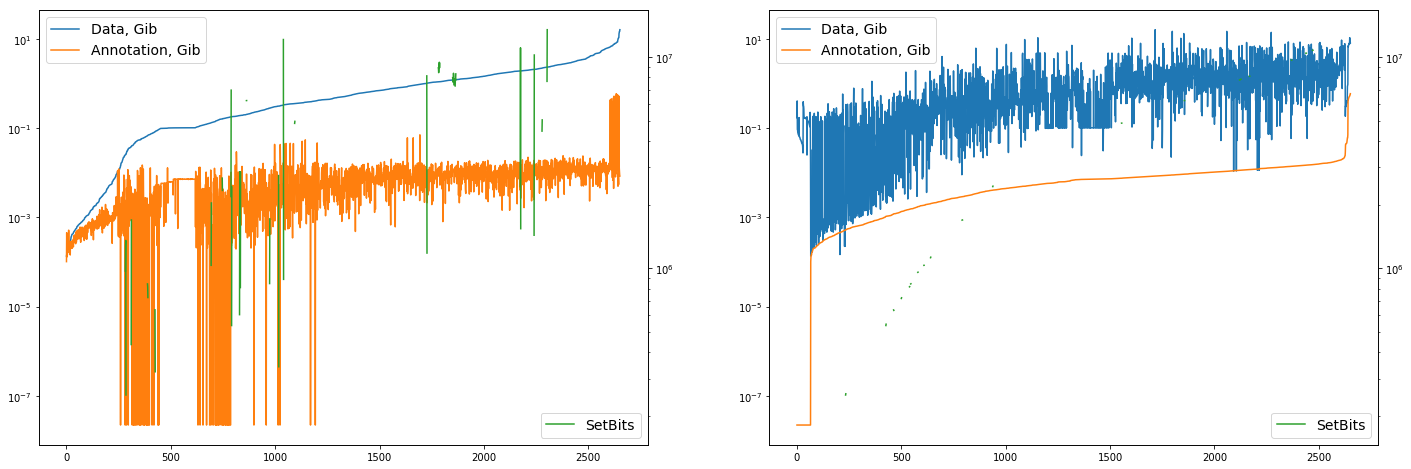

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(24, 8))

stats.sort_values('ComprData', inplace=True)
ax = axes[0]
ax.plot(stats['ComprData'].values, label='Data, Gib')
ax.plot(stats['Annotation'].values, label='Annotation, Gib')
ax.legend(loc='upper left', fontsize=14)
ax.set_yscale('log')
right_ax = ax.twinx()
right_ax._get_lines.prop_cycler = ax._get_lines.prop_cycler
right_ax.plot(stats['SetBits'].values, label='SetBits')
right_ax.legend(loc='lower right', fontsize=14)
right_ax.set_yscale('log')

stats.sort_values('Annotation', inplace=True)
ax = axes[1]
ax.plot(stats['ComprData'].values, label='Data, Gib')
ax.plot(stats['Annotation'].values, label='Annotation, Gib')
ax.legend(loc='upper left', fontsize=14)
ax.set_yscale('log')
right_ax = ax.twinx()
right_ax._get_lines.prop_cycler = ax._get_lines.prop_cycler
right_ax.plot(stats['SetBits'].values, label='SetBits')
right_ax.legend(loc='lower right', fontsize=14)
right_ax.set_yscale('log')

plt.show()

In [19]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

plt.rc('font', family='serif')#, serif='Times')
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.rc('axes', labelsize=12)
plt.rc('legend', fontsize=10)
#plt.rcParams['mathtext.fontset'] = 'stix'
#plt.rcParams['font.family'] = 'STIXGeneral'
params = {
#'text.usetex': True,
#'font.size': 15,
#'text.latex.unicode': True
}
plt.rcParams.update(params)

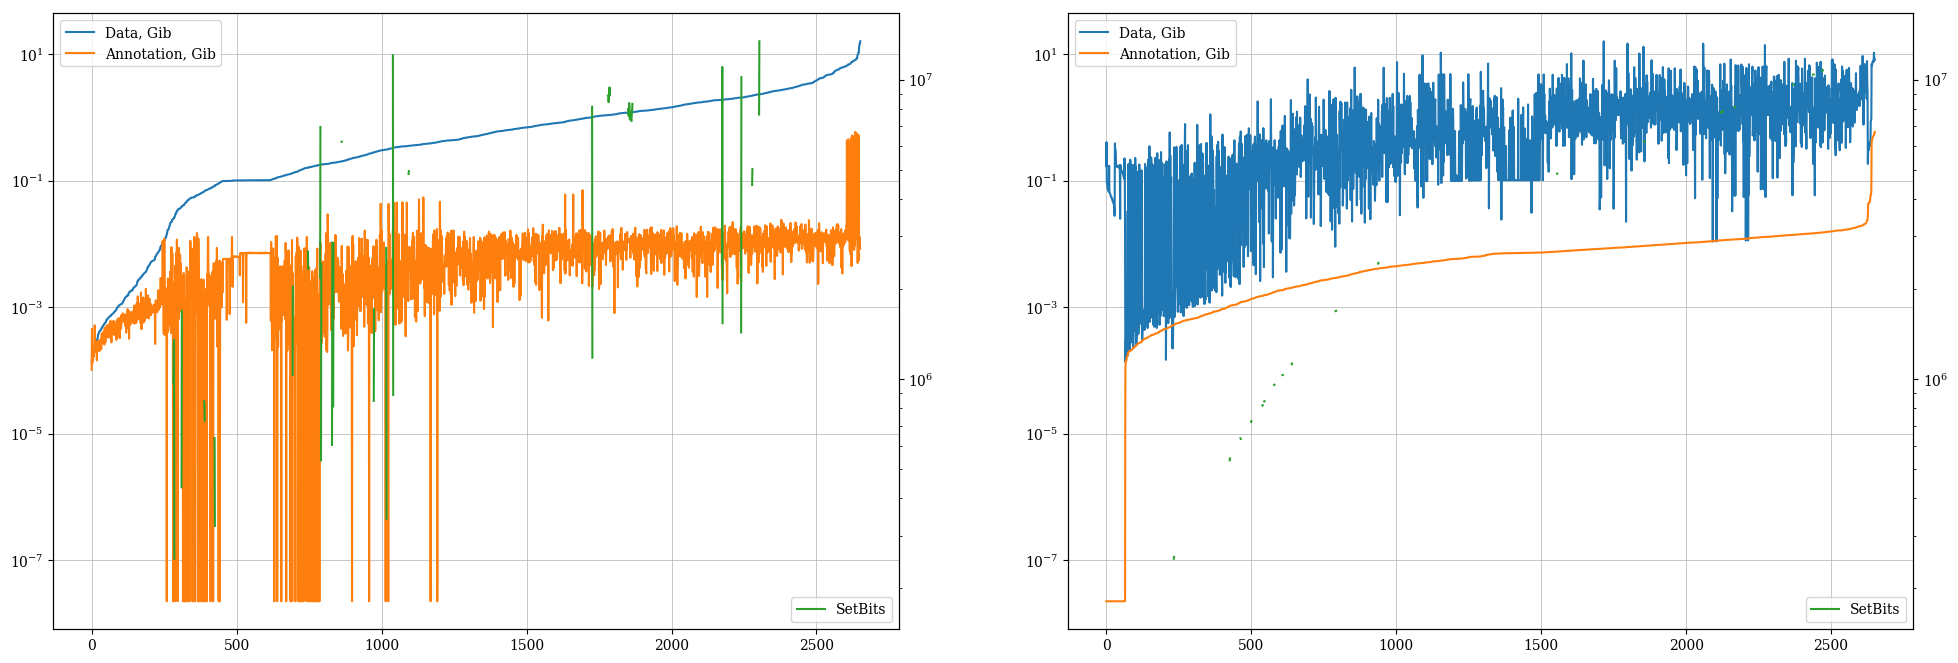

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(24, 8))

stats.sort_values('ComprData', inplace=True)
ax = axes[0]
ax.plot(stats['ComprData'].values, label='Data, Gib')
ax.plot(stats['Annotation'].values, label='Annotation, Gib')
ax.legend(loc='upper left')
ax.set_yscale('log')
right_ax = ax.twinx()
right_ax._get_lines.prop_cycler = ax._get_lines.prop_cycler
right_ax.plot(stats['SetBits'].values, label='SetBits')
right_ax.legend(loc='lower right')
right_ax.set_yscale('log')
ax.grid(linewidth=0.5)
#ax.tick_params(reset=True, direction='in', which='both', bottom=True, top=True, left=True, right=True, width=0.5)
#right_ax.tick_params(reset=True, direction='in', which='both', bottom=True, top=True, left=True, right=True, width=0.5)
#lg = ax.legend(frameon=False, loc=(0.03, 0.05))
#lg.get_frame().set_linewidth(0.5)

stats.sort_values('Annotation', inplace=True)
ax = axes[1]
ax.plot(stats['ComprData'].values, label='Data, Gib')
ax.plot(stats['Annotation'].values, label='Annotation, Gib')
ax.legend(loc='upper left')
ax.set_yscale('log')
right_ax = ax.twinx()
right_ax._get_lines.prop_cycler = ax._get_lines.prop_cycler
right_ax.plot(stats['SetBits'].values, label='SetBits')
right_ax.legend(loc='lower right')
right_ax.set_yscale('log')
ax.grid(linewidth=0.5)

plt.show()

# Simulation

In [21]:
stats['Density'].values

array([nan, nan, nan, ..., nan, nan, nan])

In [22]:
stats.sort_values('Density', inplace=True)
densities = stats['Density'].values[stats['Density'] >= 0]

num_rows = 10000

cols = np.random.random((num_rows, len(densities))) <= densities

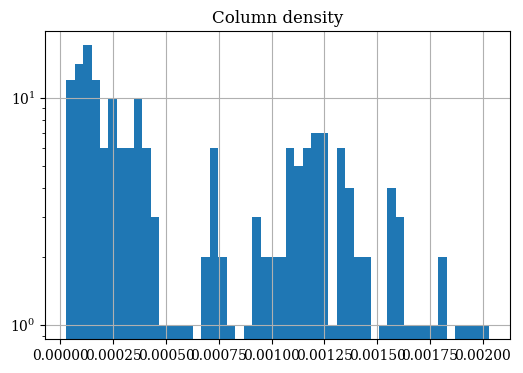

In [23]:
plt.subplots(1, 1, figsize=(6, 4))
plt.hist(sorted(densities), bins=50)
plt.title('Column density')
plt.yscale('log')
plt.grid()
plt.show()

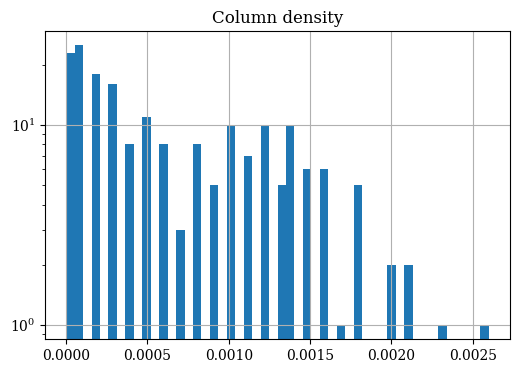

In [24]:
densities = sorted(cols.mean(0))

plt.subplots(1, 1, figsize=(6, 4))
plt.hist(sorted(densities), bins=50)
plt.title('Column density')
plt.yscale('log')
plt.grid()
plt.show()

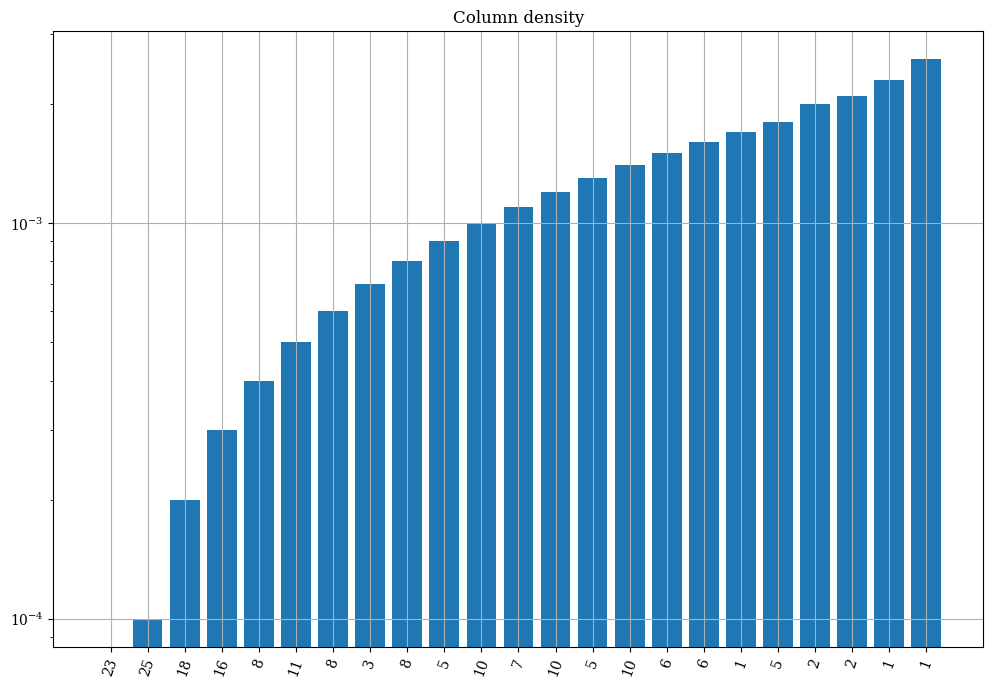

In [25]:
plt.subplots(1, 1, figsize=(12, 8))
unique_densities = np.unique(densities)
x = np.arange(len(unique_densities))
counts = [sum(densities == d) for d in unique_densities]
plt.bar(x, unique_densities)
plt.xticks(x, counts, rotation=70)
plt.title('Column density')
plt.yscale('log')
plt.grid()
plt.show()

In [26]:
cols

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

## Cost function

In [27]:
from itertools import groupby

def group_cost_(group_size, index_col):
    if group_size == 0:
        return 0
    elif group_size == 1:
        return 1
    else:
        return 1 + index_col.mean() * group_size

def group_cost(cols):
    return group_cost_(len(cols), np.sum(cols, 0) > 0)

def cost(cols, partition):
    d = {g: [] for g in partition}
    for c, g in zip(cols.T, partition):
        assert c.size == cols.shape[0]
        d[g].append(c)

    return sum([group_cost(cols) for cols in d.values()])

## No column index
$\{1,\dots,n\}\to\underbrace{\{1\}}_{G_1},\dots,\underbrace{\{n\}}_{G_n}$

In [28]:
grouping = np.arange(cols.shape[1])
grouping

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [29]:
cost(cols, grouping)

191

## Simple affine partitioning
$\{1,\dots,n\}\to\underbrace{\{1,\dots,s\}}_{G_1},\underbrace{\{s+1,\dots,2 s\}}_{G_2},\dots,\underbrace{\{(t-1)s+1,\dots,n\}}_{G_t}$

### Initial guess

In [30]:
grouping = np.arange(cols.shape[1]) // 28
grouping

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6])

In [31]:
cost(cols, grouping)

10.4118

### Exhaustive search

In [32]:
group_size = np.arange(1, 100)
costs = []

for x in group_size:
    grouping = np.arange(cols.shape[1]) // x
    costs.append(cost(cols, grouping))

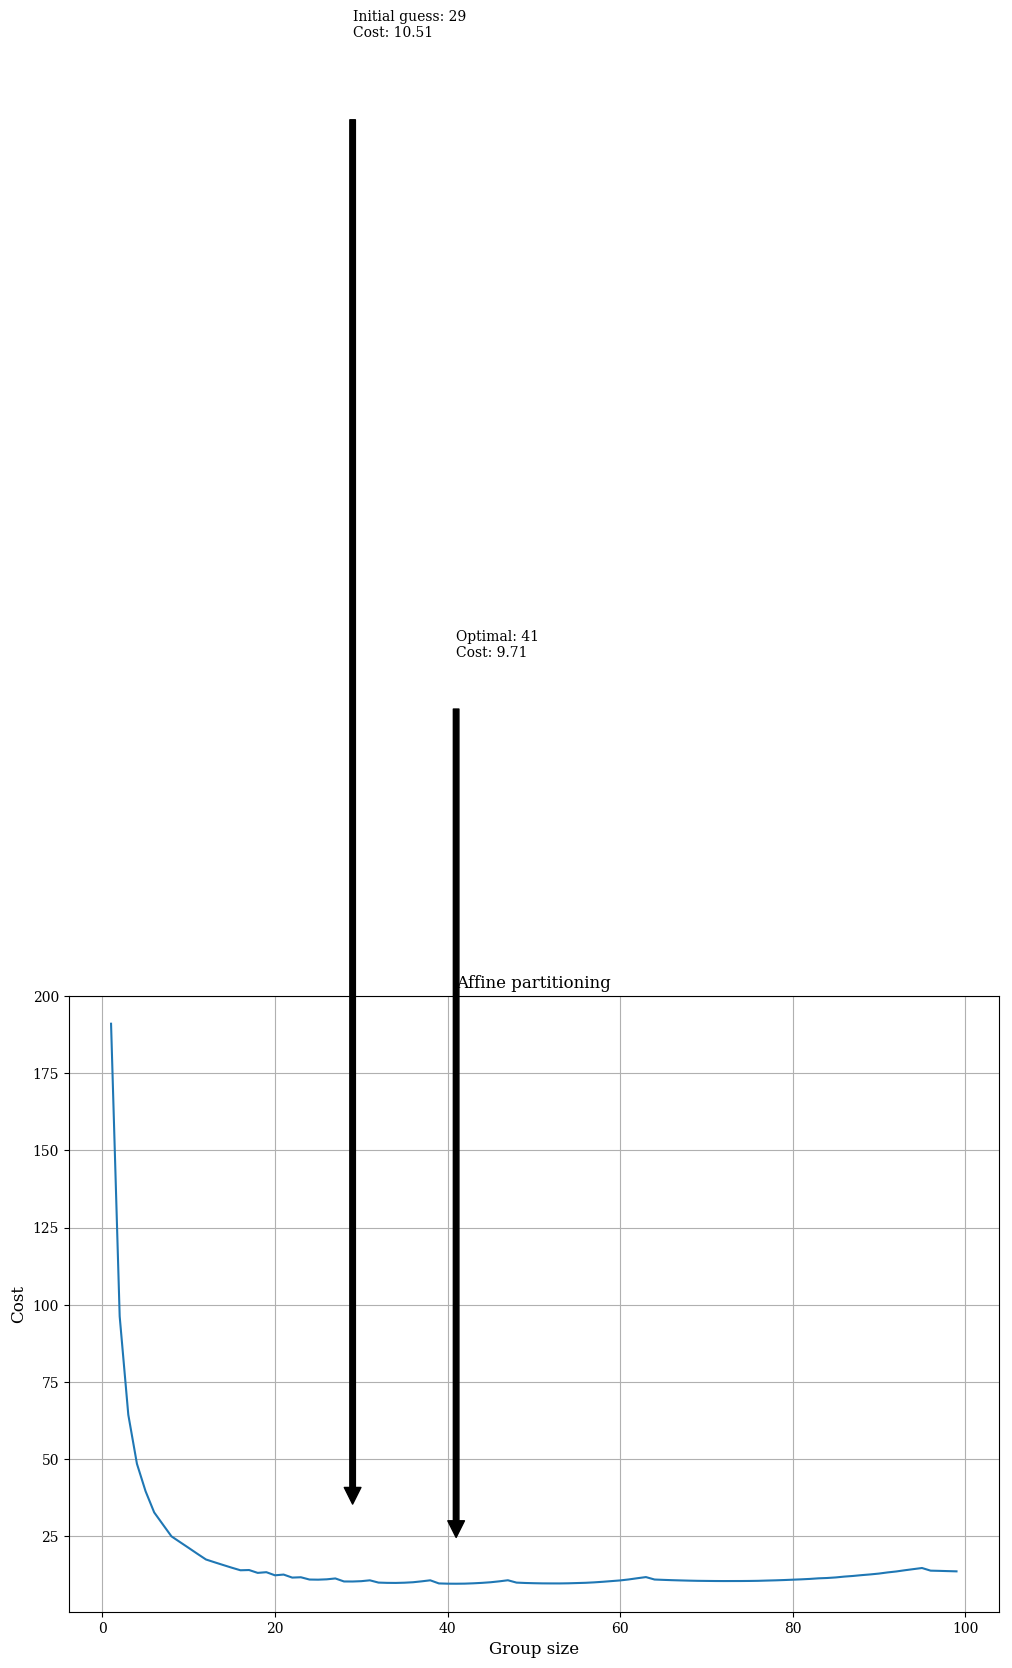

In [33]:
fig, axes = plt.subplots(1, 1, figsize=(12, 8))
plt.plot(group_size, costs)
plt.ylabel('Cost')
plt.xlabel('Group size')
plt.title('Affine partitioning')

xopt = group_size[np.argmin(costs)]
yopt = costs[xopt]
axes.annotate('Optimal: {}\nCost: {:.2f}'.format(xopt, yopt), xy=(xopt, yopt), xytext=(xopt, yopt + 300), arrowprops=dict(facecolor='black', shrink=0.05))

xopt = group_size[28]
yopt = costs[xopt]
axes.annotate('Initial guess: {}\nCost: {:.2f}'.format(xopt, yopt), xy=(xopt, yopt), xytext=(xopt, yopt + 500), arrowprops=dict(facecolor='black', shrink=0.05))

plt.grid()
plt.show()

## Greedy strategy

In [34]:
def partition_greedy(cols):
    assignment = []
    index_cols = np.zeros(cols.shape)
    partition_sizes = [0 for t in range(index_cols.shape[1])]

    print("{}\t{}\t{}\t{}".format('Column', 'Opt. part.', 'Delta cost', 'Total cost', end='\n'))

    total_cost = 0

    for i, c in enumerate(cols.T):
        updated_index = (index_cols + c.reshape(-1, 1)) > 0

        cost_deltas = [group_cost_(partition_sizes[t] + 1, updated_index[:, t]) -
                           group_cost_(partition_sizes[t], index_cols[:, t]) for t in range(index_cols.shape[1])]

        t_opt = np.argmin(np.array(cost_deltas))

        partition_sizes[t_opt] += 1
        index_cols[:, t_opt] = updated_index[:, t_opt]
        assignment.append(t_opt)
        total_cost += cost_deltas[t_opt]

        print("{}\t{}\t\t{:.5f}\t\t{:.5f}".format(i, t_opt, cost_deltas[t_opt], total_cost), end='\n')

    return assignment

In [35]:
partition = partition_greedy(cols)

Column	Opt. part.	Delta cost	Total cost
0	0		1.00000		1.00000
1	0		0.00000		1.00000
2	0		0.00000		1.00000
3	0		0.00000		1.00000
4	0		0.00050		1.00050
5	0		0.00010		1.00060
6	0		0.00010		1.00070
7	0		0.00010		1.00080
8	0		0.00100		1.00180
9	0		0.00020		1.00200
10	0		0.00130		1.00330
11	0		0.00030		1.00360
12	0		0.00030		1.00390
13	0		0.00030		1.00420
14	0		0.00180		1.00600
15	0		0.00040		1.00640
16	0		0.00210		1.00850
17	0		0.00230		1.01080
18	0		0.00440		1.01520
19	0		0.00280		1.01800
20	0		0.00510		1.02310
21	0		0.00330		1.02640
22	0		0.00120		1.02760
23	0		0.00600		1.03360
24	0		0.00390		1.03750
25	0		0.00410		1.04160
26	0		0.00160		1.04320
27	0		0.00160		1.04480
28	0		0.00740		1.05220
29	0		0.00780		1.06000
30	0		0.00820		1.06820
31	0		0.00860		1.07680
32	0		0.01560		1.09240
33	0		0.00620		1.09860
34	0		0.00640		1.10500
35	0		0.01380		1.11880
36	0		0.00330		1.12210
37	0		0.00330		1.12540
38	0		0.01110		1.13650
39	0		0.00750		1.14400
40	0		0.01180		1.15580
41	0		0.00800		1.16380
42	0

In [36]:
cost(cols, partition)

24.4739

## Regularized greedy strategies

### Linear regularization

In [37]:
def partition_greedy(cols):
    assignment = []
    index_cols = np.zeros(cols.shape)
    partition_sizes = [0 for t in range(index_cols.shape[1])]

    print("{}\t{}\t{}\t{}".format('Column', 'Opt. part.', 'Delta cost', 'Total cost', end='\n'))

    total_cost = 0

    for i, c in enumerate(cols.T):
        updated_index = (index_cols + c.reshape(-1, 1)) > 0

        cost_deltas = [group_cost_(partition_sizes[t] + 1, updated_index[:, t]) -
                           group_cost_(partition_sizes[t], index_cols[:, t]) for t in range(index_cols.shape[1])]

        t_opt = np.argmin(np.array(cost_deltas) + 5e-3 * np.array(partition_sizes))

        partition_sizes[t_opt] += 1
        index_cols[:, t_opt] = updated_index[:, t_opt]
        assignment.append(t_opt)
        total_cost += cost_deltas[t_opt]

        print("{}\t{}\t\t{:.5f}\t\t{:.5f}".format(i, t_opt, cost_deltas[t_opt], total_cost), end='\n')

    return assignment

In [38]:
partition = partition_greedy(cols)

Column	Opt. part.	Delta cost	Total cost
0	0		1.00000		1.00000
1	0		0.00000		1.00000
2	0		0.00000		1.00000
3	0		0.00000		1.00000
4	0		0.00050		1.00050
5	0		0.00010		1.00060
6	0		0.00010		1.00070
7	0		0.00010		1.00080
8	0		0.00100		1.00180
9	0		0.00020		1.00200
10	0		0.00130		1.00330
11	0		0.00030		1.00360
12	0		0.00030		1.00390
13	0		0.00030		1.00420
14	0		0.00180		1.00600
15	0		0.00040		1.00640
16	0		0.00210		1.00850
17	0		0.00230		1.01080
18	0		0.00440		1.01520
19	0		0.00280		1.01800
20	0		0.00510		1.02310
21	0		0.00330		1.02640
22	0		0.00120		1.02760
23	0		0.00600		1.03360
24	0		0.00390		1.03750
25	0		0.00410		1.04160
26	0		0.00160		1.04320
27	0		0.00160		1.04480
28	0		0.00740		1.05220
29	0		0.00780		1.06000
30	0		0.00820		1.06820
31	0		0.00860		1.07680
32	0		0.01560		1.09240
33	0		0.00620		1.09860
34	0		0.00640		1.10500
35	0		0.01380		1.11880
36	0		0.00330		1.12210
37	0		0.00330		1.12540
38	0		0.01110		1.13650
39	0		0.00750		1.14400
40	0		0.01180		1.15580
41	0		0.00800		1.16380
42	0

In [39]:
cost(cols, partition)

13.4361

### Log regularization

In [40]:
def regularize(size):
    return np.array([np.min([np.log(1 + s) / np.log(1 + cols.shape[1]) * 2, 0.8]) for s in size])

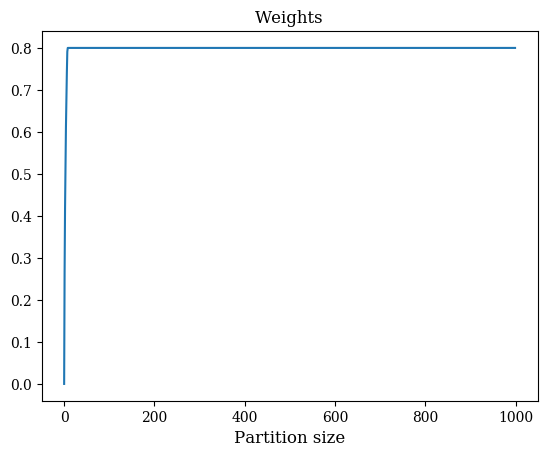

In [41]:
plt.plot(np.arange(1000), regularize(np.arange(1000)))
plt.title('Weights')
plt.xlabel('Partition size')
plt.show()

In [42]:
def partition_greedy(cols):
    assignment = []
    index_cols = np.zeros(cols.shape)
    partition_sizes = [0 for t in range(index_cols.shape[1])]

    print("{}\t{}\t{}\t{}".format('Column', 'Opt. part.', 'Delta cost', 'Total cost', end='\n'))

    total_cost = 0

    for i, c in enumerate(cols.T):
        updated_index = (index_cols + c.reshape(-1, 1)) > 0

        cost_deltas = [group_cost_(partition_sizes[t] + 1, updated_index[:, t]) -
                           group_cost_(partition_sizes[t], index_cols[:, t]) for t in range(index_cols.shape[1])]

        t_opt = np.argmin(np.array(cost_deltas) + (np.array(partition_sizes) == 0) * (-0.9 + c.mean()))

        partition_sizes[t_opt] += 1
        index_cols[:, t_opt] = updated_index[:, t_opt]
        assignment.append(t_opt)
        total_cost += cost_deltas[t_opt]

        print("{}\t{}\t\t{:.5f}\t\t{:.5f}".format(i, t_opt, cost_deltas[t_opt], total_cost), end='\n')

    return assignment

In [43]:
partition = partition_greedy(cols)

Column	Opt. part.	Delta cost	Total cost
0	0		1.00000		1.00000
1	0		0.00000		1.00000
2	0		0.00000		1.00000
3	0		0.00000		1.00000
4	0		0.00050		1.00050
5	0		0.00010		1.00060
6	0		0.00010		1.00070
7	0		0.00010		1.00080
8	0		0.00100		1.00180
9	0		0.00020		1.00200
10	0		0.00130		1.00330
11	0		0.00030		1.00360
12	0		0.00030		1.00390
13	0		0.00030		1.00420
14	0		0.00180		1.00600
15	0		0.00040		1.00640
16	0		0.00210		1.00850
17	0		0.00230		1.01080
18	0		0.00440		1.01520
19	0		0.00280		1.01800
20	0		0.00510		1.02310
21	0		0.00330		1.02640
22	0		0.00120		1.02760
23	0		0.00600		1.03360
24	0		0.00390		1.03750
25	0		0.00410		1.04160
26	0		0.00160		1.04320
27	0		0.00160		1.04480
28	0		0.00740		1.05220
29	0		0.00780		1.06000
30	0		0.00820		1.06820
31	0		0.00860		1.07680
32	0		0.01560		1.09240
33	0		0.00620		1.09860
34	0		0.00640		1.10500
35	0		0.01380		1.11880
36	0		0.00330		1.12210
37	0		0.00330		1.12540
38	0		0.01110		1.13650
39	0		0.00750		1.14400
40	0		0.01180		1.15580
41	0		0.00800		1.16380
42	0

In [44]:
cost(cols, partition)

9.3482

## Clustering

In [45]:
from sklearn import cluster

clustering = cluster.KMeans(n_clusters=30)
clustering.fit(cols.T)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=30, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

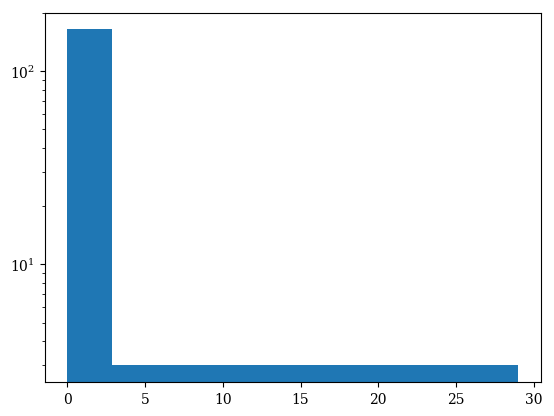

In [46]:
plt.hist(clustering.predict(cols.T))
plt.yscale('log')

In [47]:
cost(cols, clustering.predict(cols.T))

42.781800000000004

### Agglomerative clustering

In [ ]:
def find_clusters(input):
    clusters = {}

    array = [n for n in range(input.shape[0])]

    clusters[0] = array.copy()

    for k in range(1, input.shape[0]):
        min_val = sys.maxsize

        for i in range(0, input.shape[0]):
            for j in range(0, input.shape[1]):
                if(input[i][j] <= min_val):
                    min_val = input[i][j]
                    row_index = i
                    col_index = j

        for i in range(0, input.shape[0]):
            if(i != col_index and i != row_index):
                dist_centroid = cal_dist_from_centroid(i, row_index, col_index)
                input[col_index][i] = dist_centroid
                input[i][col_index] = dist_centroid

        #set the rows and columns for the cluster with higher index i.e. the row index to infinity
        for i in range (0, input.shape[0]):
            input[row_index][i] = sys.maxsize
            input[i][row_index] = sys.maxsize

        #Manipulating the dictionary to keep track of cluster formation in each step
        #if k=0,then all datapoints are clusters

        minimum = min(row_index, col_index)
        maximum = max(row_index, col_index)

        for n in range(len(array)):
            if(array[n]==maximum):
                array[n] = minimum
        clusters[k] = array.copy()

    return clusters

In [117]:
import sys
import math
import os
import heapq
import itertools

class Hierarchical_Clustering:
    def __init__(self, ipt_data, ipt_k):
        self.input_file_name = ipt_data
        self.k = ipt_k
        self.dataset = None
        self.dataset_size = 0
        self.dimension = 0
        self.heap = []
        self.clusters = []
        self.gold_standard = {}

    def initialize(self):
        """
        Initialize and check parameters
        """
        # check file exist and if it's a file or dir
        if not os.path.isfile(self.input_file_name):
            self.quit("Input file doesn't exist or it's not a file")

        self.dataset, self.clusters, self.gold_standard = self.load_data(self.input_file_name)
        self.dataset_size = len(self.dataset)

        if self.dataset_size == 0:
            self.quit("Input file doesn't include any data")

        if self.k == 0:
            self.quit("k = 0, no cluster will be generated")

        if self.k > self.dataset_size:
            self.quit("k is larger than the number of existing clusters")

        self.dimension = len(self.dataset[0]["data"])

        if self.dimension == 0:
            self.quit("dimension for dataset cannot be zero")

    """"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
    """                      Hierarchical Clustering Functions                       """
    """                                                                              """    
    """"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""

    def euclidean_distance(self, data_point_one, data_point_two):
        """
        euclidean distance: https://en.wikipedia.org/wiki/Euclidean_distance
        assume that two data points have same dimension
        """
        size = len(data_point_one)
        result = 0.0
        for i in range(size):
            f1 = float(data_point_one[i])   # feature for data one
            f2 = float(data_point_two[i])   # feature for data two
            tmp = f1 - f2
            result += pow(tmp, 2)
        result = math.sqrt(result)
        return result

    def compute_pairwise_distance(self, dataset):
        result = []
        dataset_size = len(dataset)
        for i in range(dataset_size-1):    # ignore last i
            for j in range(i+1, dataset_size):     # ignore duplication
                dist = self.euclidean_distance(dataset[i]["data"], dataset[j]["data"])

                # duplicate dist, need to be remove, and there is no difference to use tuple only
                # leave second dist here is to take up a position for tie selection
                result.append( (dist, [dist, [[i], [j]]]) )

        return result
                
    def build_priority_queue(self, distance_list):
        heapq.heapify(distance_list)
        self.heap = distance_list
        return self.heap

    def compute_centroid_two_clusters(self, current_clusters, data_points_index):
        size = len(data_points_index)
        dim = self.dimension
        centroid = [0.0]*dim
        for index in data_points_index:
            dim_data = current_clusters[str(index)]["centroid"]
            for i in range(dim):
                centroid[i] += float(dim_data[i])
        for i in range(dim):
            centroid[i] /= size
        return centroid

    def compute_centroid(self, dataset, data_points_index):
        size = len(data_points_index)
        dim = self.dimension
        centroid = [0.0]*dim
        for idx in data_points_index:
            dim_data = dataset[idx]["data"]
            for i in range(dim):
                centroid[i] += float(dim_data[i])
        for i in range(dim):
            centroid[i] /= size
        return centroid

    def hierarchical_clustering(self):
        """
        Main Process for hierarchical clustering
        """
        dataset = self.dataset
        current_clusters = self.clusters
        old_clusters = []
        heap = hc.compute_pairwise_distance(dataset)
        heap = hc.build_priority_queue(heap)

        while len(current_clusters) > self.k:
            dist, min_item = heapq.heappop(heap)
            # pair_dist = min_item[0]
            pair_data = min_item[1]

            # judge if include old cluster
            if not self.valid_heap_node(min_item, old_clusters):
                continue

            new_cluster = {}
            new_cluster_elements = sum(pair_data, [])
            new_cluster_cendroid = self.compute_centroid(dataset, new_cluster_elements)
            new_cluster_elements.sort()
            new_cluster.setdefault("centroid", new_cluster_cendroid)
            new_cluster.setdefault("elements", new_cluster_elements)
            for pair_item in pair_data:
                old_clusters.append(pair_item)
                del current_clusters[str(pair_item)]
            self.add_heap_entry(heap, new_cluster, current_clusters)
            current_clusters[str(new_cluster_elements)] = new_cluster
        current_clusters.sort()
        return current_clusters
            
    def valid_heap_node(self, heap_node, old_clusters):
        pair_dist = heap_node[0]
        pair_data = heap_node[1]
        for old_cluster in old_clusters:
            if old_cluster in pair_data:
                return False
        return True
            
    def add_heap_entry(self, heap, new_cluster, current_clusters):
        for ex_cluster in current_clusters.values():
            new_heap_entry = []
            dist = self.euclidean_distance(ex_cluster["centroid"], new_cluster["centroid"])
            new_heap_entry.append(dist)
            new_heap_entry.append([new_cluster["elements"], ex_cluster["elements"]])
            heapq.heappush(heap, (dist, new_heap_entry))

    def evaluate(self, current_clusters):
        gold_standard = self.gold_standard
        current_clustes_pairs = []

        for (current_cluster_key, current_cluster_value) in current_clusters.items():
            tmp = list(itertools.combinations(current_cluster_value["elements"], 2))
            current_clustes_pairs.extend(tmp)
        tp_fp = len(current_clustes_pairs)

        gold_standard_pairs = []
        for (gold_standard_key, gold_standard_value) in gold_standard.items():
            tmp = list(itertools.combinations(gold_standard_value, 2))
            gold_standard_pairs.extend(tmp)
        tp_fn = len(gold_standard_pairs)

        tp = 0.0
        for ccp in current_clustes_pairs:
            if ccp in gold_standard_pairs:
                tp += 1

        if tp_fp == 0:
            precision = 0.0
        else:
            precision = tp/tp_fp
        if tp_fn == 0:
            precision = 0.0
        else:
            recall = tp/tp_fn

        return precision, recall

    """"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
    """                             Helper Functions                                 """
    """                                                                              """    
    """"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
    def load_data(self, input_file_name):
        """
        load data and do some preparations
        """
        input_file = open(input_file_name, 'rU')
        dataset = []
        clusters = {}
        gold_standard = {}
        id = 0
        for line in input_file:
            line = line.strip('\n')
            row = str(line)
            row = row.split(",")
            iris_class = row[-1]

            data = {}
            data.setdefault("id", id)   # duplicate
            data.setdefault("data", row[:-1])
            data.setdefault("class", row[-1])
            dataset.append(data)

            clusters_key = str([id])
            clusters.setdefault(clusters_key, {})
            clusters[clusters_key].setdefault("centroid", row[:-1])
            clusters[clusters_key].setdefault("elements", [id])

            gold_standard.setdefault(iris_class, [])
            gold_standard[iris_class].append(id)

            id += 1
        return dataset, clusters, gold_standard

    def quit(self, err_desc):
        raise SystemExit('\n'+ "PROGRAM EXIT: " + err_desc + ', please check your input' + '\n')

    def loaded_dataset(self):
        """
        use for test only
        """
        return self.dataset

    def display(self, current_clusters, precision, recall):
        print precision
        print recall
        clusters = current_clusters.values()
        for cluster in clusters:
            cluster["elements"].sort()
            print cluster["elements"]


In [118]:
assignment = cluster.AgglomerativeClustering(n_clusters=30, pooling_func=pooling).fit_predict(cols.T)

In [119]:
cost(cols, assignment)

2063.5481